# 회귀 소개
---
- 회귀는 현대 통계학을 이루는 큰축
- 회귀 분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계한 기법

## 회귀 개요
---
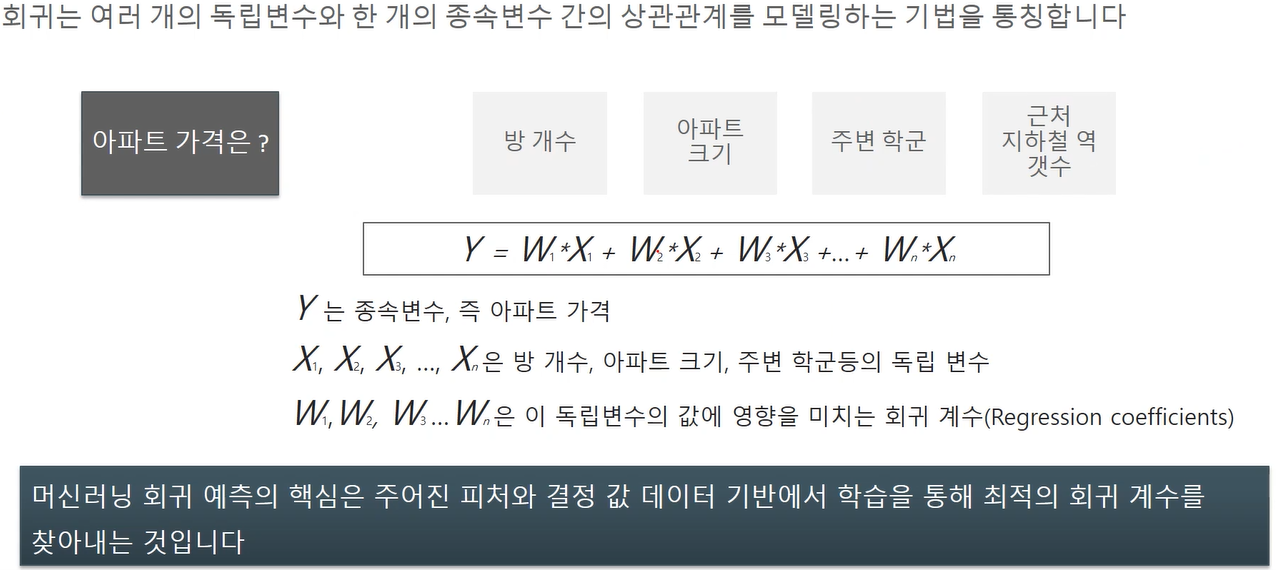

## 회귀의 유형
---
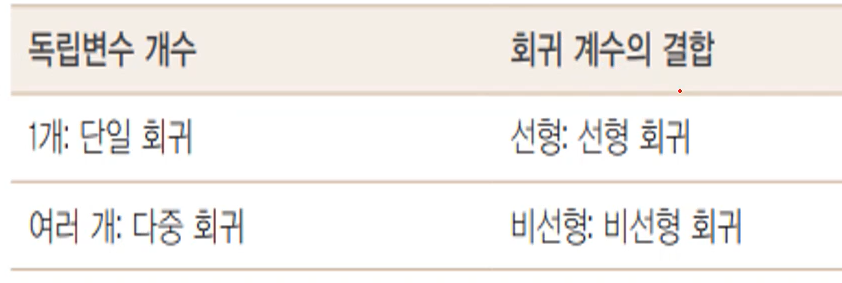

## 분류와 회귀
---
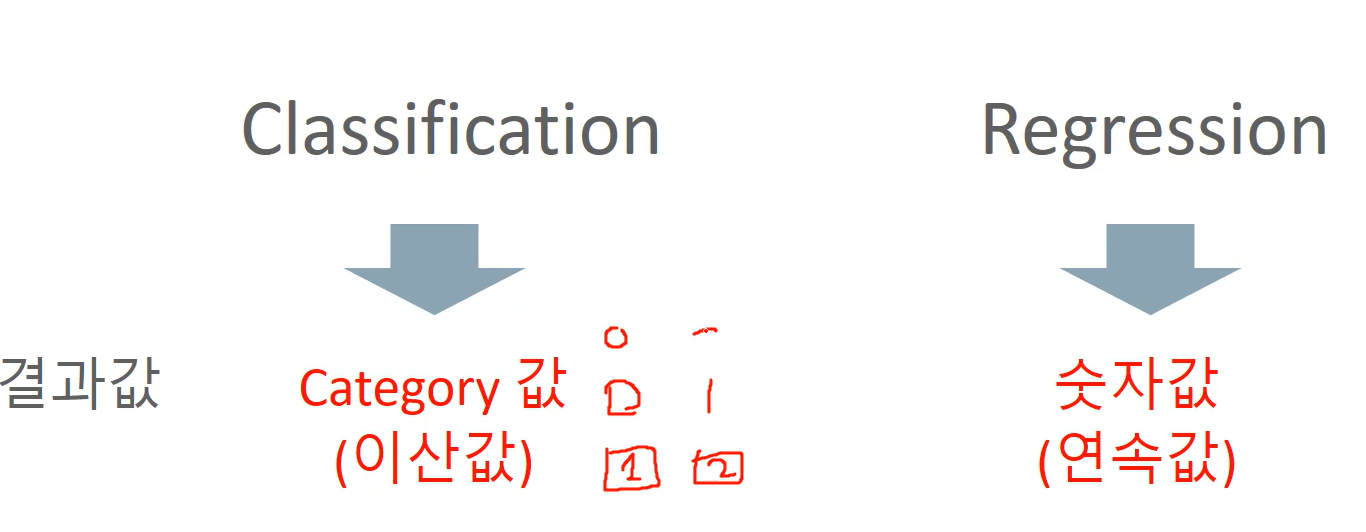


## 선형 회귀의 종류 
---
- 일반 선형 회귀 : 예측값과 실제 값의 rss를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
- 릿지 : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델이다.
- 라쏘 : 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식이다.
- 엘라스틱넷 : L2,L1 규제를 함께 결합한 모델이다.
- 로지스틱 회귀 : 로지스틱 회귀는 회귀라는 이름이 붙어있지만, 사실 분류에 사용되는 선형 모델이다.

### 머신러닝에서 최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 잔차 합이 최소가 되는 모델을 만든다는 의미이다.
### 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미도 된다.

### RSS 기반의 회귀 오류 측정
---
`RSS` : 오류 값의 제곱을 구해서 더하는 방식. 일반적으로 미분 등의 계산을 편리하게 하기 위해서 RSS방식으로 오류 합을 구한다.   
`  `  
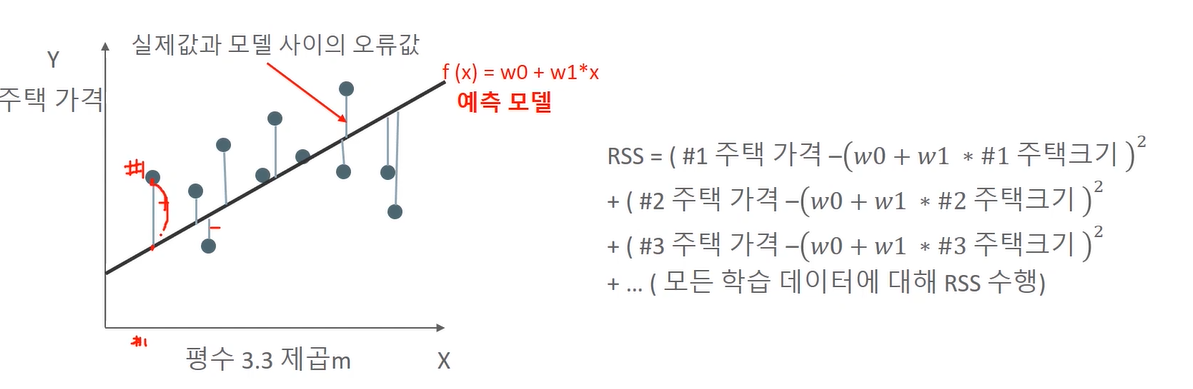


- RSS는 **회귀식의 독립 변수 x, 종속 변수 Y가 중심 변수가 아니라 w 변수(회귀 계수)가 중심 변수임을 인지 하는 것이 매우 중요하다**
- 일반 적으로 RSS는 학습 데이터의 건수로 나누어서 다음과 같이 정규화된 식으로 표현된다.

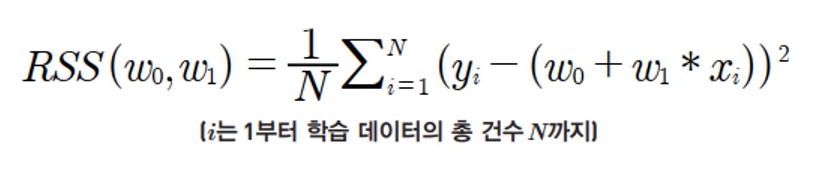

## 비용 최소화 하기 - 경사하강법 소개
---
- w 파라미터의 개수가 많으면 고차원 방정식을 동원하더라도 해결하기가 어렵다. `경사하강법`은 이러한 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 rss를 최소화 하는 방법을 직관적으로 제공하는 뛰어난 방식이다.
- 경사 하강법의 사전적 의미인 '점진적인 하강' 이라는 뜻에서도 알 수 있듯이 **점진적으로 반복적인 계산을 통해 w 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식** 이다.
- 최초 오류 값이 100이었다면 두 번째 오류 값은 100보다 작은 90 그다음은 70 등등 지속해서 오류를 감소시키는 방향으로 w 값을 업데이트.
- 그리고 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소비용으로 판단하고 그때의 w 값을 최적 파라미터로 반환.  


### **경사 하강법의 핵심은 '어떻게 하면  오류가 작아지는 방향으로 w를 보정할 수 있을 것인가 ?**
---
**미분을 통해 비용 함수의 최소값을 찾기**  
` `  
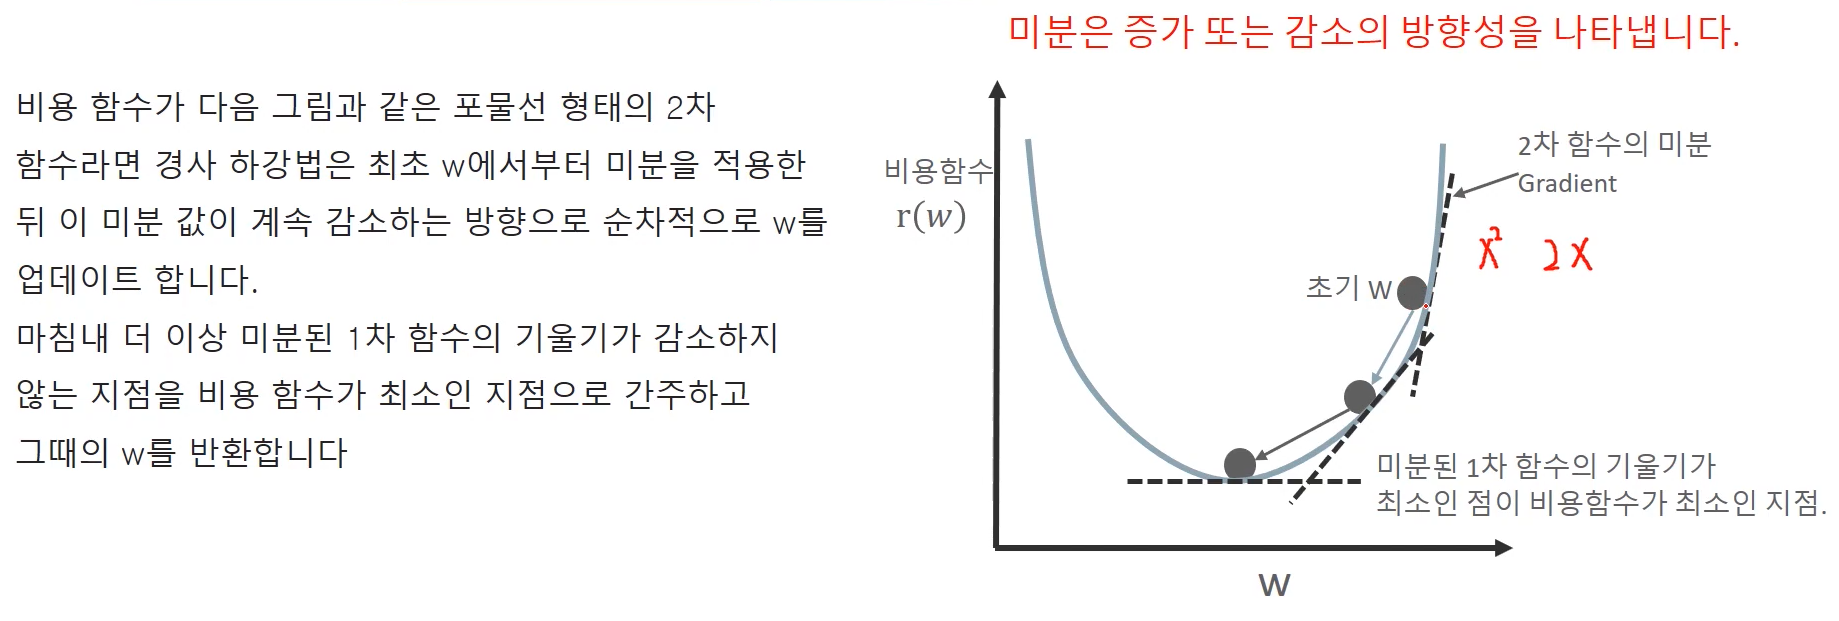


## RSS의 편미분
---
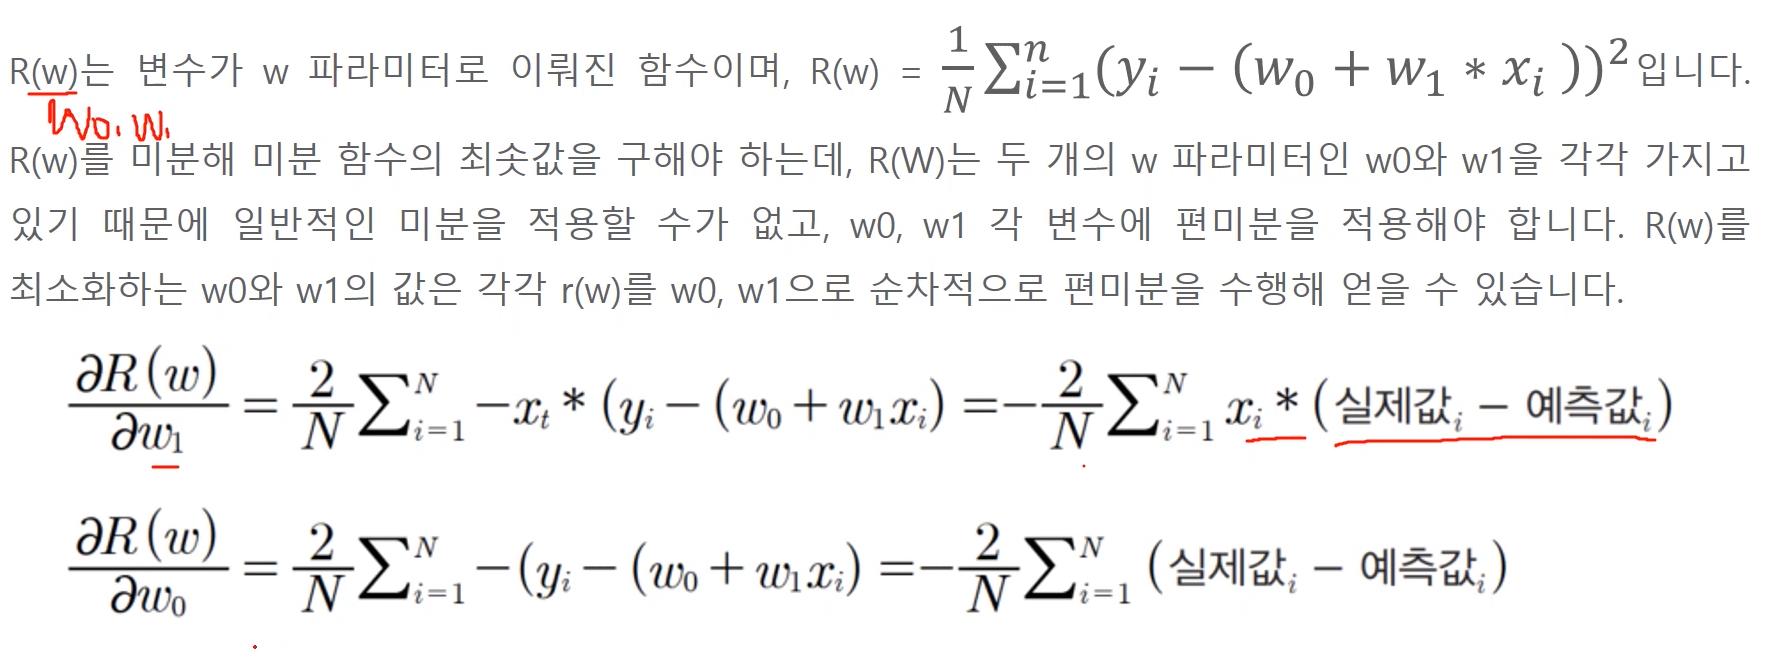

## 경사 하강법 수행 프로세스 
---
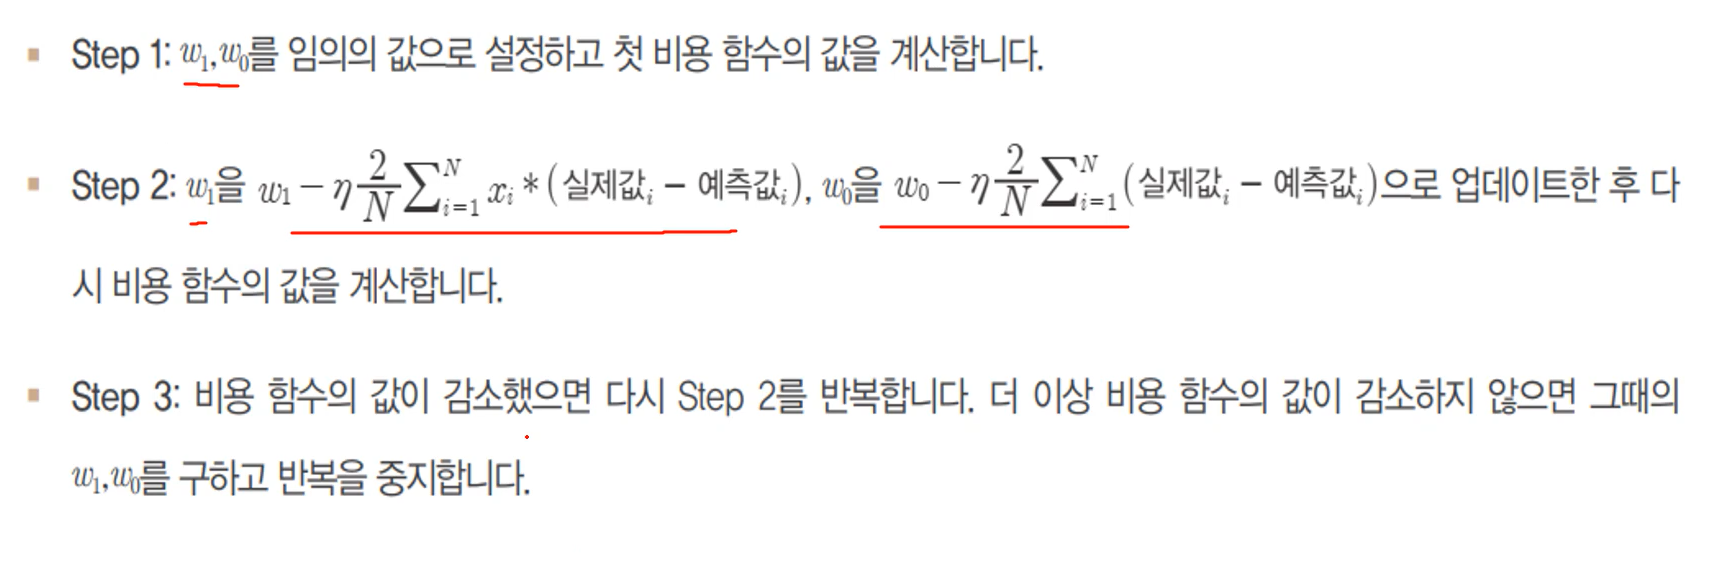

**Gradient Descent**

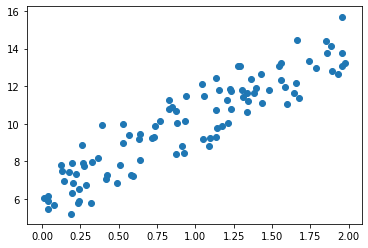

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [2]:
X.shape, y.shape

((100, 1), (100, 1))

In [3]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

**반복적으로 경사 하강법을 이용하여 get_weight_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성**

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

**예측 오차 비용 계산을 수행하는 함수 생성 및 경사 하강법 수행**

In [5]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


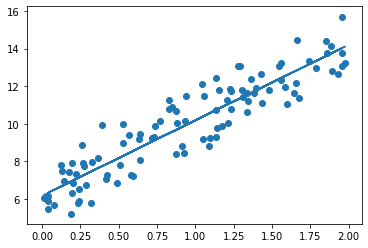

In [6]:
plt.scatter(X, y)
plt.plot(X,y_pred)

**미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출**

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))
  